In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
genes = ['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']
cols = ['Control_1', 'Control_2', 'Control_3', 'Treatment_1', 'Treatment_2', 'Treatment_3']
data = [
    [120, 135, 128,  280, 295, 310],  
    [500, 480, 520,  490, 510, 505],  
    [50,  55,  48,   20,  18,  22],   
    [200, 190, 210,  195, 205, 200],  
    [800, 820, 790,  810, 795, 815]   
]

df = pd.DataFrame(data, index=genes, columns=cols)

display(df.shape)
display(df.describe())
display(df)


(5, 6)

,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,334.000000,336.000000,339.200000,359.00000,364.600000,370.400000
std,311.897419,314.511526,309.032684,303.57042,298.677585,304.077786
min,50.000000,55.000000,48.000000,20.00000,18.000000,22.000000
25%,120.000000,135.000000,128.000000,195.00000,205.000000,200.000000
50%,200.000000,190.000000,210.000000,280.00000,295.000000,310.000000
75%,500.000000,480.000000,520.000000,490.00000,510.000000,505.000000
max,800.000000,820.000000,790.000000,810.00000,795.000000,815.000000


,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3
Gene1,120,135,128,280,295,310
Gene2,500,480,520,490,510,505
Gene3,50,55,48,20,18,22
Gene4,200,190,210,195,205,200
Gene5,800,820,790,810,795,815


In [13]:
# divide column names
control_col = [col for col in df.columns if col.startswith('Control')]
# control_col = [col for col in df.columns if 'Control' in col]
treatment_col = [col for col in df.columns if col.startswith('Treatment')]

control_df = df[control_col]
treatment_df = df[treatment_col]

print(control_col)
print(treatment_col)

['Control_1', 'Control_2', 'Control_3']
['Treatment_1', 'Treatment_2', 'Treatment_3']


In [14]:
# Finding mean
df['Control_mean'] = df[control_col].mean(axis=1)
df['Treatment_mean'] = df[treatment_col].mean(axis=1)

display(df)

,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3,Control_mean,Treatment_mean
Gene1,120,135,128,280,295,310,127.666667,295.000000
Gene2,500,480,520,490,510,505,500.000000,501.666667
Gene3,50,55,48,20,18,22,51.000000,20.000000
Gene4,200,190,210,195,205,200,200.000000,200.000000
Gene5,800,820,790,810,795,815,803.333333,806.666667


In [15]:
# Log2fold
df['Log2fold'] = np.log2(df['Treatment_mean'] / df['Control_mean'])

df['Status'] = 'No change'
df.loc[df['Log2fold'] > 0, 'Status'] = 'Upregulated'
df.loc[df['Log2fold'] < 0, 'Status'] = 'Downregulated'

display(df)

,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3,Control_mean,Treatment_mean,Log2fold,Status
Gene1,120,135,128,280,295,310,127.666667,295.000000,1.208333,Upregulated
Gene2,500,480,520,490,510,505,500.000000,501.666667,0.004801,Upregulated
Gene3,50,55,48,20,18,22,51.000000,20.000000,-1.350497,Downregulated
Gene4,200,190,210,195,205,200,200.000000,200.000000,0.000000,No change
Gene5,800,820,790,810,795,815,803.333333,806.666667,0.005974,Upregulated


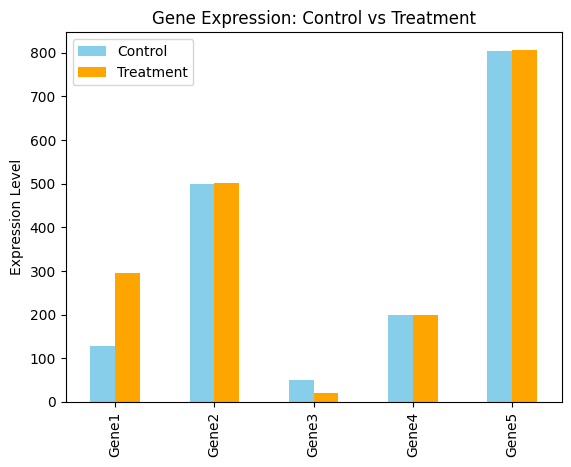

In [16]:
# boxplot
mean_df = pd.DataFrame({
    'Control': df['Control_mean'],
    'Treatment': df['Treatment_mean']
})

mean_df.plot(kind='bar', y=['Control','Treatment'], color=['skyblue','orange'])
plt.title('Gene Expression: Control vs Treatment')
plt.ylabel('Expression Level')
plt.show()

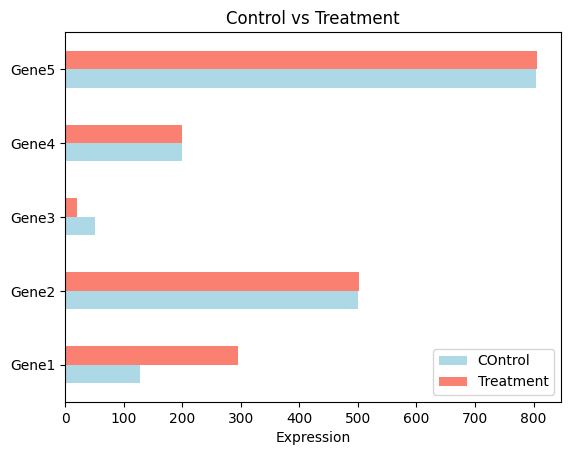

In [17]:
# Horizontal Bar plot
df[['Control_mean', 'Treatment_mean']].plot(kind='barh', color=['lightblue', 'salmon'])
plt.title('Control vs Treatment')
plt.xlabel('Expression')
plt.legend(['COntrol', 'Treatment'])
plt.show()

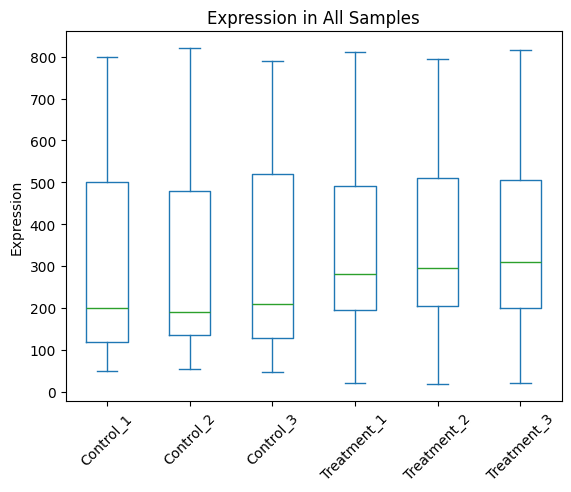

In [18]:
# Boxplot
df[['Control_1','Control_2','Control_3', 'Treatment_1', 'Treatment_2', 'Treatment_3',]].plot(kind='box')
plt.title('Expression in All Samples')
plt.ylabel('Expression')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_74/1680622426.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df['Control_mean'][i]+10, df['Treatment_mean'][i], gene)


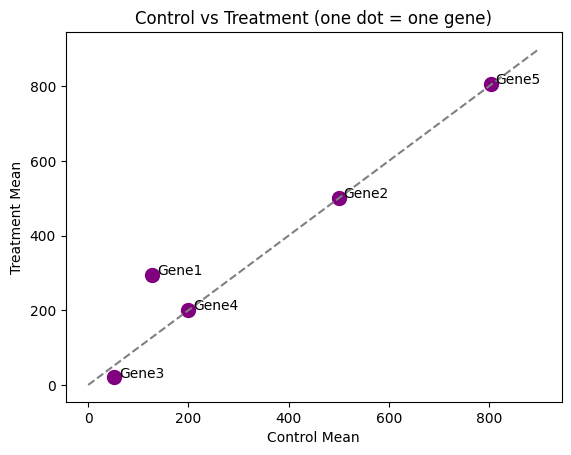

In [19]:
# Scatter Plot
plt.scatter(df['Control_mean'], df['Treatment_mean'], color='purple', s=100)
for i, gene in enumerate(df.index):
    plt.text(df['Control_mean'][i]+10, df['Treatment_mean'][i], gene)
plt.plot([0, 900], [0, 900], '--', color='gray')  # diagonal line
plt.xlabel('Control Mean')
plt.ylabel('Treatment Mean')
plt.title('Control vs Treatment (one dot = one gene)')
plt.show()

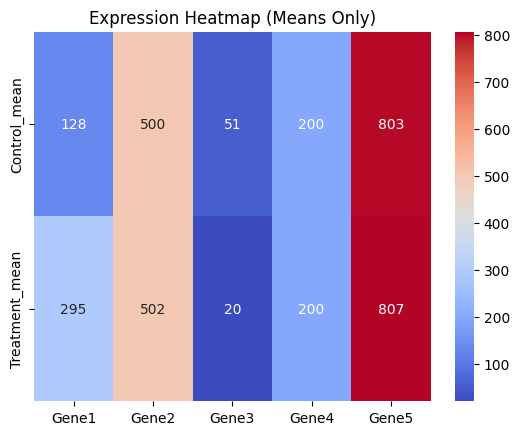

In [20]:
# Heatmap (just the means)
simple_data = df[['Control_mean', 'Treatment_mean']]
sns.heatmap(simple_data.T, annot=True, cmap="coolwarm", fmt=".0f")
plt.title('Expression Heatmap (Means Only)')
plt.show()

/tmp/ipykernel_74/3017877623.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Expression', data=plot_data, palette=['lightblue', 'lightcoral'], inner='quartile')


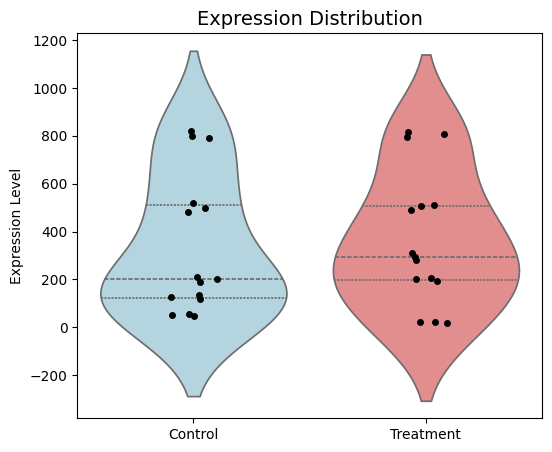

In [21]:
plot_data = df[['Control_1','Control_2','Control_3', 'Treatment_1', 'Treatment_2', 'Treatment_3']].stack().reset_index()
plot_data.columns = ['Gene', 'Sample', 'Expression']
plot_data['Group'] = plot_data['Sample'].apply(lambda x: 'Control' if 'Control' in x else 'Treatment')

# VIOLIN PLOT
plt.figure(figsize=(6,5))
sns.violinplot(x='Group', y='Expression', data=plot_data, palette=['lightblue', 'lightcoral'], inner='quartile')
sns.stripplot(x='Group', y='Expression', data=plot_data, color='black', size=5)
plt.title('Expression Distribution', fontsize=14)
plt.ylabel('Expression Level')
plt.xlabel('')
plt.show()

/tmp/ipykernel_74/2796087391.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(df['Log2fold'][i]) > 1 or df['pvalue'][i] < 0.05:
/tmp/ipykernel_74/2796087391.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df['Log2fold'][i]+0.05, -np.log10(df['pvalue'][i])+0.2, gene, fontsize=12)


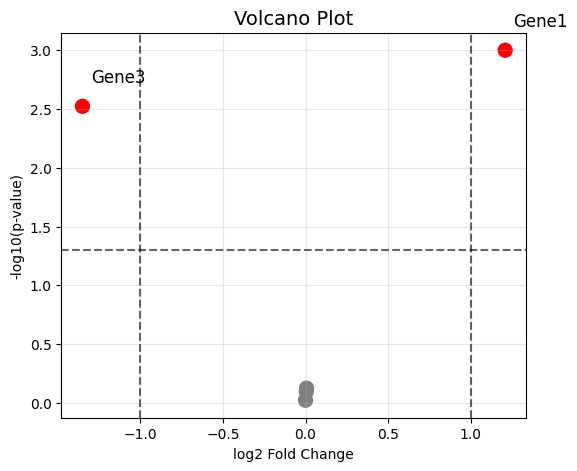

In [22]:
# VOLCANO PLOT
# In real life you would have p-values
df['pvalue'] = [0.001, 0.8, 0.003, 0.95, 0.75]  # fake p-values (Gene1 and Gene3 "significant")

plt.figure(figsize=(6,5))
plt.scatter(df['Log2fold'], -np.log10(df['pvalue']),
            c=['red' if abs(x)>1 and p<0.05 else 'gray' 
               for x,p in zip(df['Log2fold'], df['pvalue'])], s=100)

# Label only the interesting genes
for i, gene in enumerate(df.index):
    if abs(df['Log2fold'][i]) > 1 or df['pvalue'][i] < 0.05:
        plt.text(df['Log2fold'][i]+0.05, -np.log10(df['pvalue'][i])+0.2, gene, fontsize=12)

plt.axvline(-1, color='black', linestyle='--', alpha=0.6)
plt.axvline(1, color='black', linestyle='--', alpha=0.6)
plt.axhline(-np.log10(0.05), color='black', linestyle='--', alpha=0.6)
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
display(df)

,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3,Control_mean,Treatment_mean,Log2fold,Status,pvalue
Gene1,120,135,128,280,295,310,127.666667,295.000000,1.208333,Upregulated,0.001
Gene2,500,480,520,490,510,505,500.000000,501.666667,0.004801,Upregulated,0.800
Gene3,50,55,48,20,18,22,51.000000,20.000000,-1.350497,Downregulated,0.003
Gene4,200,190,210,195,205,200,200.000000,200.000000,0.000000,No change,0.950
Gene5,800,820,790,810,795,815,803.333333,806.666667,0.005974,Upregulated,0.750


In [24]:
# New DF from old
output_df = pd.DataFrame({
    'Control_mean': df['Control_mean'],
    'Treatment_mean': df['Treatment_mean'],
    'Log2FC': df['Log2fold'],
    'Status': df['Status']
}, index=genes)

# read csv
# df2 = pd.read_csv('cancer_expression.csv')

# output as csv
output_df.to_csv('output.csv')

display(output_df)

,Control_mean,Treatment_mean,Log2FC,Status
Gene1,127.666667,295.000000,1.208333,Upregulated
Gene2,500.000000,501.666667,0.004801,Upregulated
Gene3,51.000000,20.000000,-1.350497,Downregulated
Gene4,200.000000,200.000000,0.000000,No change
Gene5,803.333333,806.666667,0.005974,Upregulated


In [25]:
# Example DNA sequences (short for demo; replace with yours)
data = {
    'Gene': ['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5'],
    'DNA_sequence': [
        'ATGCGTAAAGCG',  # Starts with ATG (start codon)
        'ATGGCTTGGTAA',
        'ATGAAATTTTAG',
        'ATGCCTTATTGA',
        'ATGGTCCATTAG'
    ]
}

df = pd.DataFrame(data)
print(df)

    Gene  DNA_sequence
0  Gene1  ATGCGTAAAGCG
1  Gene2  ATGGCTTGGTAA
2  Gene3  ATGAAATTTTAG
3  Gene4  ATGCCTTATTGA
4  Gene5  ATGGTCCATTAG


In [26]:
# function to get mRNA

def do_transcription(dna):
    complemet = {'A':'U', 'T':'A', 'G':'C', 'C':'G'}
    mrna = ''.join(complemet[base] for base in dna)
    return mrna

df['mRNA'] = df['DNA_sequence'].apply(do_transcription)

display(df)

,Gene,DNA_sequence,mRNA
0,Gene1,ATGCGTAAAGCG,UACGCAUUUCGC
1,Gene2,ATGGCTTGGTAA,UACCGAACCAUU
2,Gene3,ATGAAATTTTAG,UACUUUAAAAUC
3,Gene4,ATGCCTTATTGA,UACGGAAUAACU
4,Gene5,ATGGTCCATTAG,UACCAGGUAAUC


In [27]:
# function to get protein
genetic_code = {
    'AUG': 'M', 'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L',
    'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S',
    'UAU': 'Y', 'UAC': 'Y', 'UAA': '*', 'UAG': '*',
    'UGU': 'C', 'UGC': 'C', 'UGA': '*', 'UGG': 'W',
    'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L',
    'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
    'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
    'AUU': 'I', 'AUC': 'I', 'AUA': 'I', 'ACA': 'T',
    'ACC': 'T', 'ACG': 'T', 'ACU': 'T',
    'AAU': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
    'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
    'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V',
    'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
    'GAU': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
    'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'
}

def do_translation(mrna):
    protein = ''
    counter = 0
    while counter < len(mrna):
        codon = mrna[counter:(counter+3)]
        protein += protein.join(genetic_code.get(codon, '?'))
        counter+=3
    return protein

df['Protein'] = df['mRNA'].apply(do_translation)

display(df)

,Gene,DNA_sequence,mRNA,Protein
0,Gene1,ATGCGTAAAGCG,UACGCAUUUCGC,YAFR
1,Gene2,ATGGCTTGGTAA,UACCGAACCAUU,YRTI
2,Gene3,ATGAAATTTTAG,UACUUUAAAAUC,YFKI
3,Gene4,ATGCCTTATTGA,UACGGAAUAACU,YGIT
4,Gene5,ATGGTCCATTAG,UACCAGGUAAUC,YQVI


In [39]:
# GC Count
def gc_content(sequence):
    count_G = sequence.count('G')
    count_C = sequence.count('C')
    total = len(sequence)
    if total == 0:
        return 0.0
    return round(((count_G + count_C) / total) * 100, 2)

df['GC_COUNT'] = df.apply(lambda row: gc_content(row['DNA_sequence']), axis=1)
display(df)

,Gene,DNA_sequence,mRNA,Protein,GC_COUNT
0,Gene1,ATGCGTAAAGCG,UACGCAUUUCGC,YAFR,50.00
1,Gene2,ATGGCTTGGTAA,UACCGAACCAUU,YRTI,41.67
2,Gene3,ATGAAATTTTAG,UACUUUAAAAUC,YFKI,16.67
3,Gene4,ATGCCTTATTGA,UACGGAAUAACU,YGIT,33.33
4,Gene5,ATGGTCCATTAG,UACCAGGUAAUC,YQVI,41.67


In [28]:
# mutations
# substitution mutation
def substitution_mut(seq, pos, sub):
    seq = seq[:pos-1] + sub + seq[pos:]
    return seq

# insertion mutation
def insertion_mut(seq, pos, new):
    seq = seq[:pos-1] + new + seq[pos-1:]
    return seq

# deletion mutation
def deletion_mut(seq, pos):
    seq = seq[:pos-1] + seq[pos:]
    return seq

dna_seq = 'ATGAAATTTTAG'
display(dna_seq)
display(substitution_mut(dna_seq, 3, 'C'))
display(insertion_mut(dna_seq, 3, 'C'))
display(deletion_mut(dna_seq, 3))

'ATGAAATTTTAG'

'ATCAAATTTTAG'

'ATCGAAATTTTAG'

'ATAAATTTTAG'

In [29]:
df_prot = pd.DataFrame({
    'Gene': ['Gene1', 'Gene2', 'Gene3'],
    'Original_Protein': ['MKVLAG', 'MALLKR', 'MTPKLR'],
    'Mutated_Protein' : ['MKVLPG', 'MALQKR', 'MTPKLR']   # some changes
})

display(df_prot)

,Gene,Original_Protein,Mutated_Protein
0,Gene1,MKVLAG,MKVLPG
1,Gene2,MALLKR,MALQKR
2,Gene3,MTPKLR,MTPKLR


In [34]:
# find identity
def find_identity(seq1, seq2):
    min_len = min(len(seq1), len(seq2))
    if min_len == 0:
        return 0.0

    match = 0
    for i in range(min_len):
        if seq1[i] == seq2[i]:
            match += 1

    identity = (match / min_len) * 100
    return round(identity, 2)

df_prot['Identity'] = df_prot.apply(lambda row: find_identity(row['Original_Protein'], row['Mutated_Protein']), axis=1)

display(df_prot)

,Gene,Original_Protein,Mutated_Protein,Identity
0,Gene1,MKVLAG,MKVLPG,83.33
1,Gene2,MALLKR,MALQKR,83.33
2,Gene3,MTPKLR,MTPKLR,100.00


In [38]:
# Very simple similarity groups
similar_groups = {
    'KRH': 'positive',
    'DE':  'negative',
    'AVLIMFWP': 'hydrophobic',
    'STYCNGQ':  'polar'
}

# Make a lookup: which group each amino acid belongs to
aa_to_group = {}
for aas, group in similar_groups.items():
    for aa in aas:
        aa_to_group[aa] = group

# display(aa_to_group)

def similarity_percent(seq1, seq2):
    if len(seq1) == 0 or len(seq2) == 0:
        return 0.0
    similar = 0
    for a, b in zip(seq1, seq2):
        if a == b:
            similar += 1
        elif aa_to_group.get(a, '') == aa_to_group.get(b, ''):
            similar += 1
    return round((similar / len(seq1)) * 100, 2)

# Apply
df_prot['Similarity_%'] = df_prot.apply(
    lambda row: similarity_percent(row['Original_Protein'], row['Mutated_Protein']), axis=1
)

display(df_prot)

,Gene,Original_Protein,Mutated_Protein,Identity,Similarity_%
0,Gene1,MKVLAG,MKVLPG,83.33,100.00
1,Gene2,MALLKR,MALQKR,83.33,83.33
2,Gene3,MTPKLR,MTPKLR,100.00,100.00


In [40]:
# Motifs
def count_motifs(seq, len_mot):
    if len(seq) < len_mot or len_mot == 0:
        return 0
    return (len(seq) - len_mot + 1)

def find_motifs(seq, motif_len):
    if len(seq) < motif_len or motif_len == 0:
        return []

    motifs = []
    for i in range(len(seq) - motif_len + 1):
        motifs.append(seq[i:i+motif_len])

    return motifs

sequence = "ATGCGTAGCTAA"
all_trimers = find_motifs(sequence, 3)
print(all_trimers)

['ATG', 'TGC', 'GCG', 'CGT', 'GTA', 'TAG', 'AGC', 'GCT', 'CTA', 'TAA']


In [41]:
def global_alignment_matrix(seq1, seq2, match=2, mismatch=-1, gap=-2):
    n = len(seq1) + 1
    m = len(seq2) + 1
    matrix = np.zeros((n, m), dtype=int)
    
    # Initialize first row and column
    for i in range(n):
        matrix[i][0] = i * gap
    for j in range(m):
        matrix[0][j] = j * gap
    
    # Fill the matrix
    for i in range(1, n):
        for j in range(1, m):
            diagonal = matrix[i-1][j-1] + (match if seq1[i-1]==seq2[j-1] else mismatch)
            left     = matrix[i][j-1] + gap
            up       = matrix[i-1][j] + gap
            matrix[i][j] = max(diagonal, left, up)
    
    # Convert to DataFrame with labels
    df_matrix = pd.DataFrame(matrix)
    df_matrix.index = ['-'] + list(seq1)
    df_matrix.columns = ['-'] + list(seq2)
    return df_matrix

# Example
seq1 = "MKVLAG"
seq2 = "MKVLPG"

matrix = global_alignment_matrix(seq1, seq2)
print("Global Alignment Matrix:")
print(matrix)

Global Alignment Matrix:
    -  M  K  V  L   P   G
-   0 -2 -4 -6 -8 -10 -12
M  -2  2  0 -2 -4  -6  -8
K  -4  0  4  2  0  -2  -4
V  -6 -2  2  6  4   2   0
L  -8 -4  0  4  8   6   4
A -10 -6 -2  2  6   7   5
G -12 -8 -4  0  4   5   9


In [42]:
def local_alignment_matrix(seq1, seq2, match=2, mismatch=-1, gap=-2):
    n = len(seq1) + 1
    m = len(seq2) + 1
    matrix = np.zeros((n, m), dtype=int)
    
    for i in range(1, n):
        for j in range(1, m):
            diagonal = matrix[i-1][j-1] + (match if seq1[i-1]==seq2[j-1] else mismatch)
            left     = matrix[i][j-1] + gap
            up       = matrix[i-1][j] + gap
            matrix[i][j] = max(0, diagonal, left, up)   # ← zero instead of negative!
    
    df_matrix = pd.DataFrame(matrix)
    df_matrix.index = ['-'] + list(seq1)
    df_matrix.columns = ['-'] + list(seq2)
    return df_matrix

print("Local Alignment Matrix:")
print(local_alignment_matrix("MKVLAG", "VLPG"))

Local Alignment Matrix:
   -  V  L  P  G
-  0  0  0  0  0
M  0  0  0  0  0
K  0  0  0  0  0
V  0  2  0  0  0
L  0  0  4  2  0
A  0  0  2  3  1
G  0  0  0  1  5
